In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
import numpy.linalg as LA

In [2]:
yale = sio.loadmat('yalefaces.mat')
yalefaces = yale['yalefaces']
h,w,n = yalefaces.shape
data = np.reshape(yalefaces, (h*w,n))
mu = np.average(data,1)[:,np.newaxis]
data = data - mu
# data_squr = data@data.T
data_squr = np.matmul(data,data.T)


In [3]:
eig_w,eig_v = LA.eigh(data_squr)
eig_w = np.flip(eig_w)
eig_v = np.flip(eig_v,1)

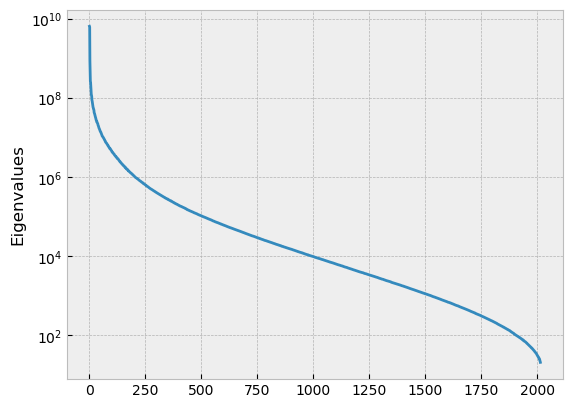

In [4]:
x = np.arange(len(eig_w))
plt.style.use(["default",'bmh'])
plt.semilogy(x,eig_w)
plt.ylabel("Eigenvalues")
plt.savefig('15')

In [5]:
totalvar = np.sum(eig_w)
perc = [0.95,0.99]
length = len(eig_w)
for j in perc:
    temp = 0
    for i in range(length):
        temp += eig_w[i]
        if temp/totalvar > j:
            break
    print("%d components can represent %f percentage of variance"%(i+1,j))
    print("%f percentage of dimensions are reduced"%((length-1-i)/length))

43 components can represent 0.950000 percentage of variance
0.978671 percentage of dimensions are reduced
167 components can represent 0.990000 percentage of variance
0.917163 percentage of dimensions are reduced


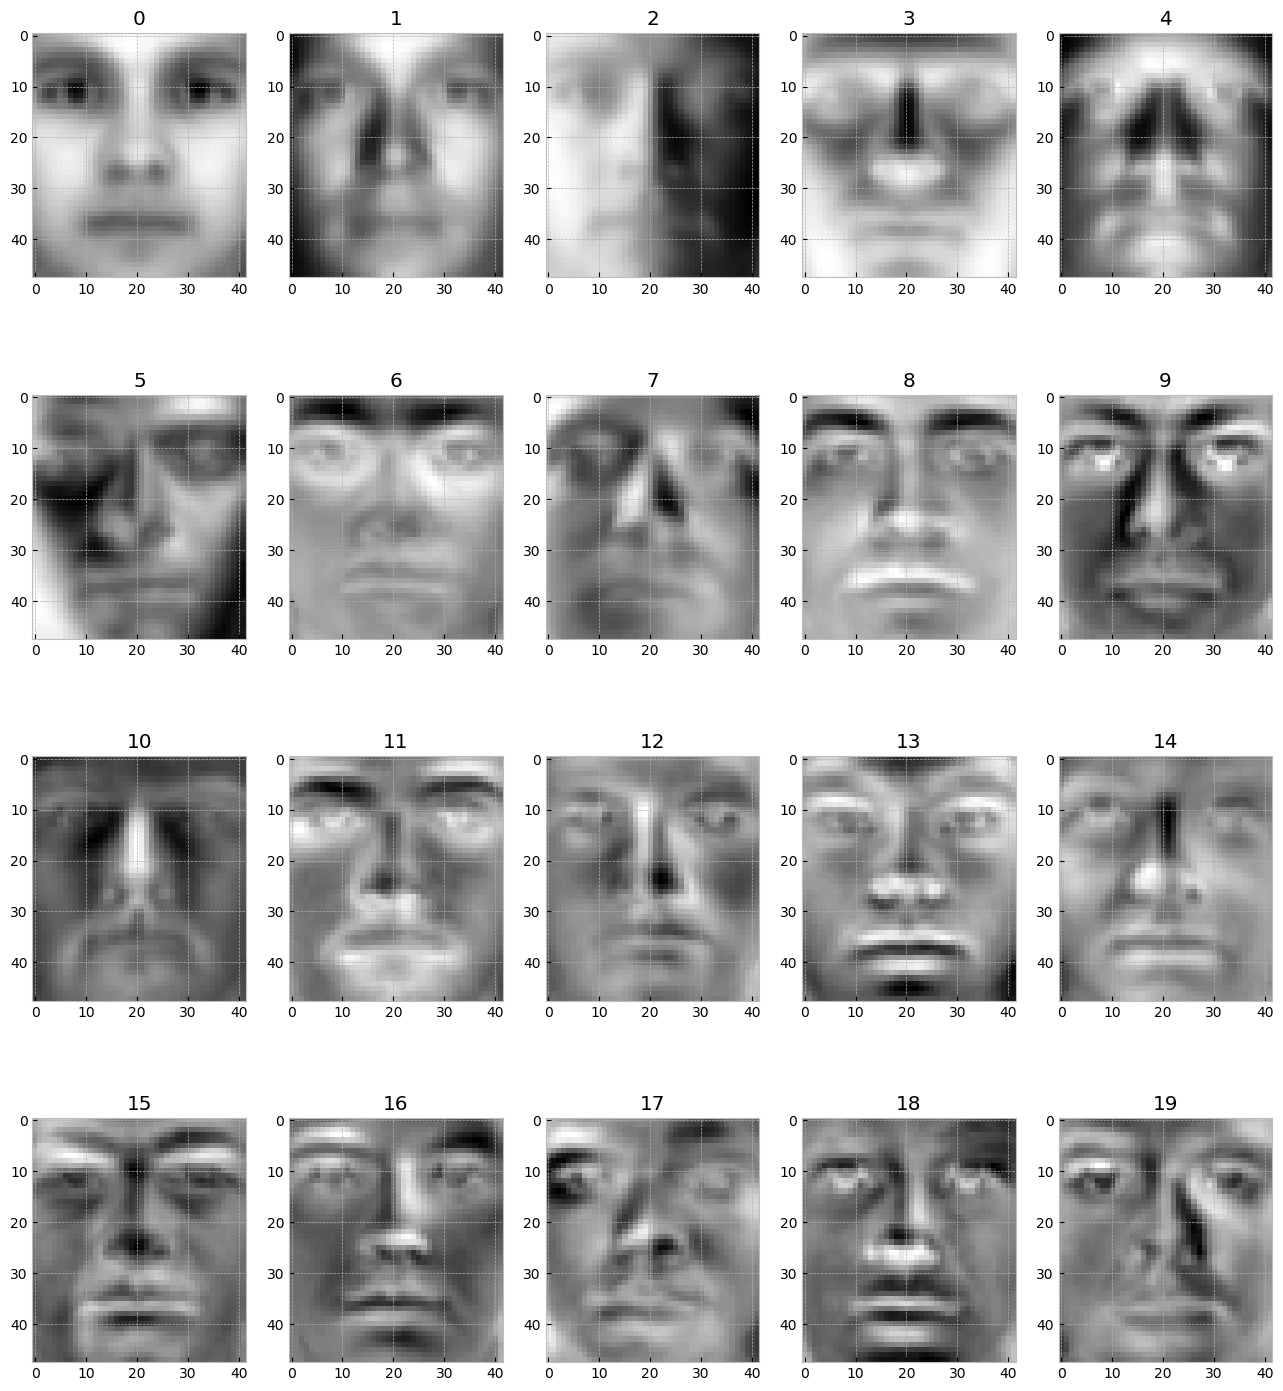

In [6]:
plotvector = np.concatenate((mu,eig_v[:,0:19]), axis=1)
plotimg = np.reshape(plotvector,(h,w,20))
fig,axes = plt.subplots(4,5,figsize=(16,18))

for i in range(20):
    axes[i//5,i%5].imshow(plotimg[:,:,i],cmap=plt.get_cmap('gray'))
    axes[i//5,i%5].set_title(i)

It seems that picture 5 and 2 are capturing light source from right and left respectively. Both 3 and 4 are capturing light source from bottom